In [1]:
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
img_origin = plt.imread('../DATA/BTD.jpg')

In [3]:
img_origin.shape

(4608, 2592, 3)

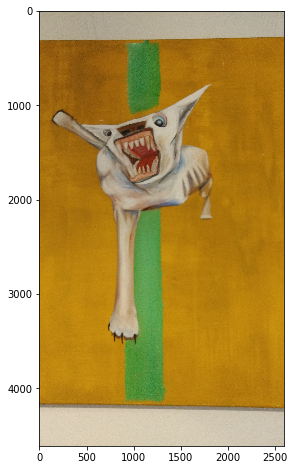

In [7]:
def plti(im, h=8, **kwargs):
    y = im.shape[0] # height
    x = im.shape[1] # width
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(im,interpolation="none", **kwargs)
    #plt.axis('off')
plti(img_origin)

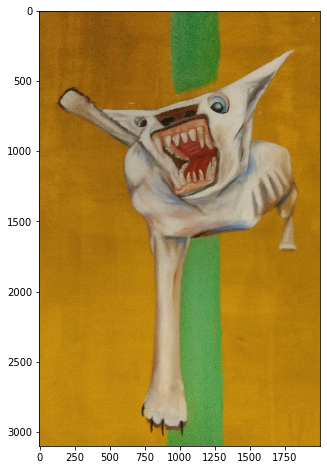

In [8]:
img = img_origin[500:3600,:2000,:]    
plti(img)

In [9]:
def rgb(img):
    fig, axis = plt.subplots(nrows = 1,ncols = 3,figsize=(15,5))
    for c,ax in zip(range(3),axis):
        tmp_im = np.zeros(img.shape,dtype = 'uint8')
        tmp_im[:,:,c] = img[:,:,c]
        ax.imshow(tmp_im)
        ax.set_axis_off()

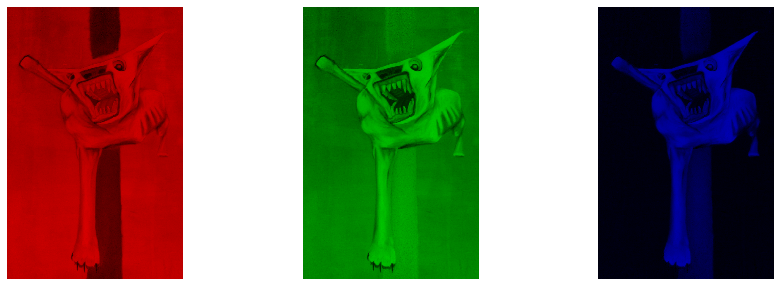

In [10]:
rgb(img)

In [11]:
type(img[:,:,0][0][0])

numpy.uint8

In [12]:
def to_grayscale(im, weights = np.c_[0.2989, 0.5870, 0.1140]):
    """
    Transforms a colour image to a greyscale image by
    taking the mean of the RGB values, weighted
    by the matrix weights
    """
    tile = np.tile(weights, reps=(im.shape[0],im.shape[1],1))
    print(tile)
    return np.sum(tile * im, axis=2)

[[[0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  ...
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]]

 [[0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  ...
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]]

 [[0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  ...
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]]

 ...

 [[0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  ...
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]]

 [[0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  ...
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]]

 [[0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  ...
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]
  [0.2989 0.587  0.114 ]]]


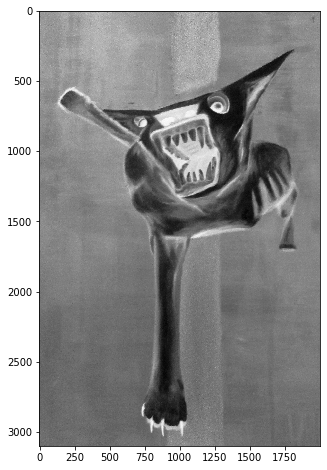

In [13]:
img_gray = to_grayscale(img)
plti(img_gray, cmap='Greys')

In [15]:
from scipy.ndimage.interpolation import zoom
im_small = zoom(img, (0.2,0.2,1))

In [16]:
from scipy.signal import convolve2d

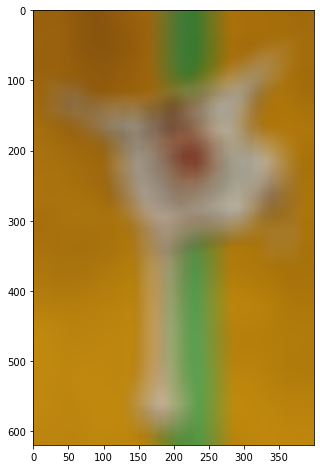

In [20]:
def convolve_all_colours(im, window):
    """
    Convolves im with window, over all three colour channels
    """
    ims = []
    for d in range(3):
        im_conv_d = convolve2d(im[:,:,d], window, mode="same", boundary="symm")
        ims.append(im_conv_d)

    im_conv = np.stack(ims, axis=2).astype("uint8")
    
    return im_conv

n=50
window = np.ones((n,n))
window /= np.sum(window)
plti(convolve_all_colours(im_small, window))


In [19]:
window.shape

(50, 50)